**Lecturer**

Set up MATLAB

In [32]:
cd matlab
pwd
clear all
format compact


ans =

    '/Users/eechris/dev/eglm03-textbook/content/05/1/matlab'



# Frequency Response Design of a Lead Compensator

This section examines the design of phase-lead cascade compensators using Bode diagrams.

## Analysis

The plant is a type 1 servomechanism with transfer function:

$$G(s) = \frac{1}{s(s+1)}.$$

The system has unity gain feedback and the compensated closed-loop system is to have a static velocity error constant of 10 and a phase margin of 50%.

Defining the system in Matlab 

In [1]:
nG = 1; dG = [1, 1, 0];
G = tf(nG,dG);
H = tf(1,1);
Go = G; 

In order to display the sort of diagrams we want, we need to do more work with the graphics than is strictly necessary. In other words, you shouldn't worry too much about the MATLAB commands shown here. We recommend that in a real interactive design session you make use of the `ltiview` to examine the system response diagrams.

First of all, I want to show the uncompensated frequency response diagrams plotted with the asymptotic bode curves. 
There is no built-in function for the latter so I have included the source code for a function `asymp`, that does what we want. See the appendix for information of how to use this function.

We predefine the frequency values that we want:

In [4]:
w = logspace(-1,2);  

Now we calculate the magnitude and phase

In [5]:
[m0,p0] = bode(Go,w);

The result of `[m0,p0] = bode(Go,w)` produces a data structure. We need to convert the magnitude to decibels and extract the data into column vectors for plotting.

In [6]:
m0dB = 20*log10(m0);
m0dB = reshape(m0dB,length(w),1);
p0 = reshape(p0,length(w),1);

In [7]:
[Ao,Bo,Co,Do]=ssdata(Go);

and then the asymptotic response is computed using the function asymp:

In [8]:
am0dB = asymp(Ao,Bo,Co,Do,w);

The plots

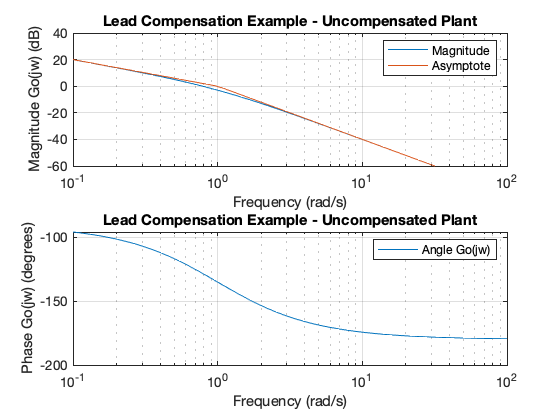

In [9]:
subplot(211)
semilogx(w,m0dB,w,am0dB),...
   axis([0.1, 100, -60, 40]),...
   title('Lead Compensation Example - Uncompensated Plant'),...
   legend('Magnitude','Asymptote'),ylabel('Magnitude Go(jw) (dB)'),xlabel('Frequency (rad/s)'),...
   grid
subplot(212)
semilogx(w,p0),...
   title('Lead Compensation Example - Uncompensated Plant'),...
   legend('Angle Go(jw)'),ylabel('Phase Go(jw) (degrees)'),xlabel('Frequency (rad/s)'),...
   grid

Note that the gain cut-off frequency $\omega_m \approx 1$ rad.s<sup>-1</sup> and the phase margin $\phi_m \approx 45^\circ$.

## Gain compensation for steady-state performance

For this system:
	 
$$K_v =s \left.G_0(s)\right|_{s=0} = \left.\frac{1}{s(s+1)}\right|_{s=0} = 1.$$

We want $K_v =10$ so, with gain compensation only: 

In [10]:
Kv = 10;
Kc = Kv;

The gain compensated open-loop transfer function is now

In [11]:
KcGo = Kc*Go;  

We produce a new Bode diagram for the gain compensated system. The same commands are issued as before.

In [12]:
[m1,p1] = bode(KcGo,w);
m1dB = 20*log10(m1);
m1dB = reshape(m1dB,length(w),1);
p1 = reshape(p1,length(w),1);

Asymptotic magnitude

In [13]:
[A1,B1,C1,D1]=ssdata(KcGo);
am1dB = asymp(A1,B1,C1,D1,w);

Plots

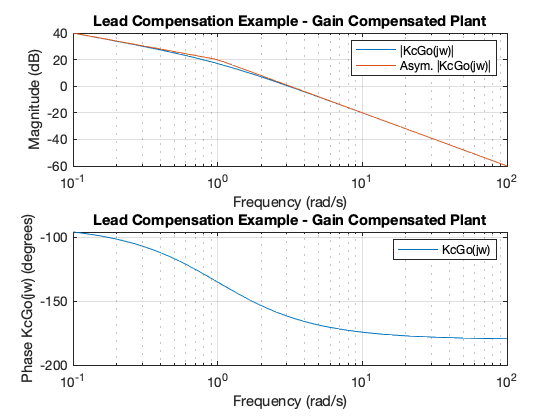

In [14]:
clf
subplot(211)
semilogx(w,m1dB,w,am1dB),...
   axis([0.1, 100, -60, 40]),...
   title('Lead Compensation Example - Gain Compensated Plant'),...
   legend('|KcGo(jw)|','Asym. |KcGo(jw)|'),...
   ylabel('Magnitude (dB)'),xlabel('Frequency (rad/s)'),...
   grid
% Phase is unchanged
subplot(212)
semilogx(w,p1),...
   title('Lead Compensation Example - Gain Compensated Plant'),...
   legend('KcGo(jw)'),ylabel('Phase KcGo(jw) (degrees)'),xlabel('Frequency (rad/s)'),...
   grid

You should note that the magnitude plot has moved up by 20dB (10) but that the phase response is unchanged. A consequence of this is that $\omega_n \approx 3$ rad.s<sup>-1</sup>, a three-fold increase, so that the system will be about three-times faster. However, the phase margin is now $\phi_m\approx 20^\circ$, a reduction of 25%, so we would expect a reduction in stability – meaning larger overshoot and longer settling time. We need to use a combination of a zero and a pole to add phase lead at $\omega_1$ to restore the phase margin and therefore restore the transient performance to the pre-compensation values.

## Phase Lead Compensation

The lead compensator has transfer function

$$D(s)=K_c\left(\frac{1+Ts}{1+\alpha s}\right),\;\alpha<1.$$

We have already established that the gain $K_c = 10$. We now chose the parameters $\alpha$ and $T$ to give us the phase margin of $50^\circ$ that we require. 

The relationship between the maximum phase in a phase-lead compensator is given by

$$\phi_{\mathrm{max}} = \left(\frac{1-\alpha}{1+\alpha}\right).$$

For the phase-lead compensator, the maximum phase-lead occurs mid-point logarithmically between the cut-off frequencies of $1/T$  and  $1/(\alpha T)$. This will be given by $\omega = 1/(T\sqrt{\alpha})$  so we arrange for $\omega=\omega_1$ and hence

$$ T = \frac{1}{\omega_1\sqrt{\alpha}}.$$
	  
A plot of $\phi_{\mathrm{max}}$ against $\alpha$ is useful for design:

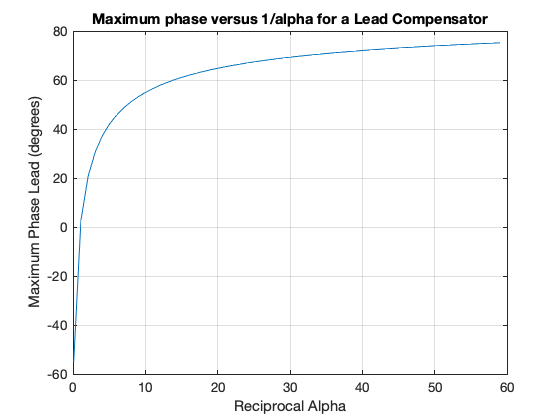

In [15]:
recipr_alpha = 0.1:60;
alpha = 1./recipr_alpha;
subplot(111)
plot(recipr_alpha,asin((1 - alpha)./(1 + alpha))*180/pi),...
   grid,...
   title('Maximum phase versus 1/alpha for a Lead Compensator'),...
   xlabel('Reciprocal Alpha'),...
   ylabel('Maximum Phase Lead (degrees)')

Inverting the formula
	 .
$$\alpha=\left(\frac{1-\sin\phi_{\mathrm{max}}}{1+\sin\phi_{\mathrm{max}}}\right).$$

We can use this formula to calculate the required value of $\alpha$. We want a phase margin of $50^\circ$. We have $20^\circ$ so we need to add $30^\circ$ via a phase lead compensator. Experience shows that this will be conservative because the increase in gain added by the lead compensator at high frequency, causes an increase in $\omega_1$ so we will find that we are on the downward slope of the phase characteristic when the compensator is added to the plant.

We therefore allow a bit extra – 50% in this case –  so choose $\phi_{\mathrm{max}}=45^\circ$.

In [16]:
phi_max = 45*pi/180; % angles in Matlab always in radians
sin_Pm = sin(phi_max);
alpha = (1 - sin_Pm)/(1 + sin_Pm)


alpha =

    0.1716



Now the compensator (without the gain) is ...

In [17]:
w1 = 3;
T = 1/(sqrt(alpha)*w1);
aT = alpha*T;
D = tf([T, 1],[aT, 1])
D = zpk(D)


D =
 
  0.8047 s + 1
  ------------
  0.1381 s + 1
 
Continuous-time transfer function.


D =
 
  5.8284 (s+1.243)
  ----------------
     (s+7.243)
 
Continuous-time zero/pole/gain model.



Let's examine the frequency response of the lead compensator

In [18]:
[md,pd] = bode(D,w);
mddB = 20*log10(md);
mddB = reshape(mddB,length(w),1);
pd = reshape(pd,length(w),1);

Asymptotic magnitude

In [19]:
[Ad,Bd,Cd,Dd]=ssdata(D);
amddB = asymp(Ad,Bd,Cd,Dd,w);

Plots

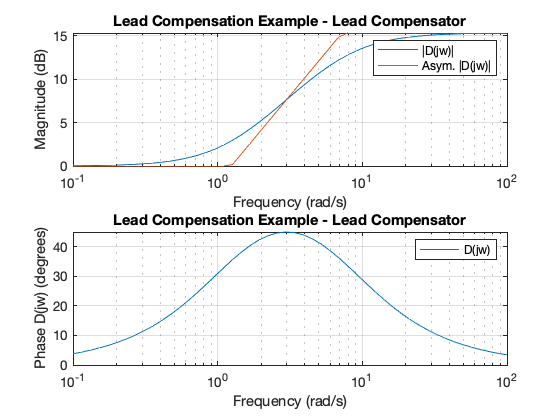

In [20]:
clf
subplot(211)
semilogx(w,mddB,w,amddB),...
   title('Lead Compensation Example - Lead Compensator'),...
   legend('|D(jw)|','Asym. |D(jw)|'),...
   ylabel('Magnitude (dB)'),xlabel('Frequency (rad/s)'),...
   grid
% Phase is unchanged
subplot(212)
semilogx(w,pd),...
   title('Lead Compensation Example - Lead Compensator'),...
   legend('D(jw)'),ylabel('Phase D(jw) (degrees)'),xlabel('Frequency (rad/s)'),...
   grid

Now put the whole lot together

In [21]:
KcDG = series(Kc*D,Go);
[m2,p2] = bode(KcDG,w);
m2dB = 20*log10(m2);
m2dB = reshape(m2dB,length(w),1);
p2 = reshape(p2,length(w),1);

Asymptotic magnitude

In [22]:
[A2,B2,C2,D2]=ssdata(KcDG);
am2dB = asymp(A2,B2,C2,D2,w);

Plots

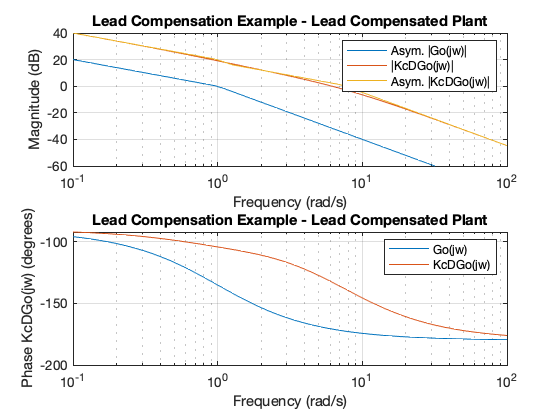

In [23]:
clf
subplot(211)
semilogx(w,am0dB,w,m2dB,w,am2dB),...
   axis([0.1, 100, -60, 40]),...
   title('Lead Compensation Example - Lead Compensated Plant'),...
   legend('Asym. |Go(jw)|','|KcDGo(jw)|','Asym. |KcDGo(jw)|'),...
   ylabel('Magnitude (dB)'),xlabel('Frequency (rad/s)'),...
   grid
% Phase ...
subplot(212)
semilogx(w,p0,w,p2),...
   title('Lead Compensation Example - Lead Compensated Plant'),...
   legend('Go(jw)','KcDGo(jw)'),ylabel('Phase KcDGo(jw) (degrees)'),xlabel('Frequency (rad/s)'),...
   grid  

We can see that the bandwidth has increased again (it's about double what we achieved with gain alone) but the phase margin looks about right. To find out how have we done we can compute the achieved phase margin:

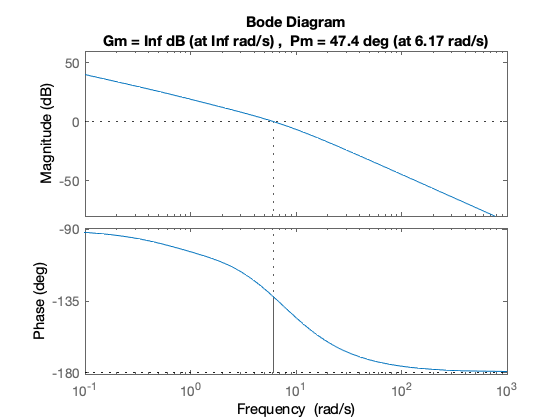

In [24]:
clf
margin(KcDG)

The phase margin is about $47^\circ$ and the gain cut-off frequency is now 6 rad.s<sup>-1</sup>.

## Evaluation of the Design
We now put everything together to evaluate the design. 

### Bode Plots

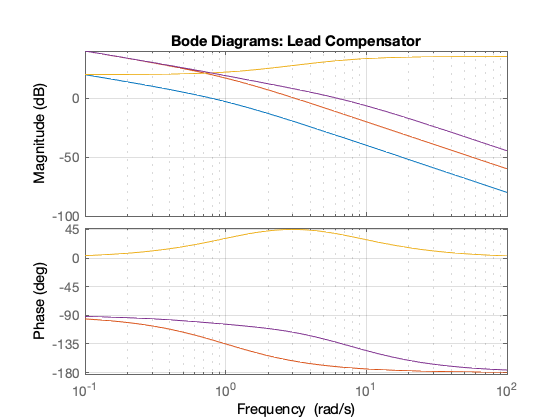

In [25]:
% Bode 
%  blue -- Uncompensated Go(jw)
%  green - Gain compensated KcGo(jw)
%  red -- Lead Compensator KcD(jw)
%  cyan -- Lead Compensated D(jw)Go(jw)
bode(Go,KcGo,Kc*D,KcDG,w),...
   title('Bode Diagrams: Lead Compensator'),...
   grid

### Nyquist Diagrams

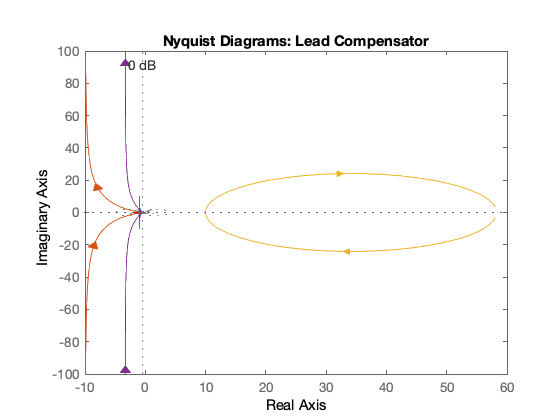

In [26]:
% Nyquist 
%  blue -- Uncompensated Go(jw)
%  green - Gain compensated KcGo(jw)
%  red -- Lead Compensator KcD(jw)
%  cyan -- Lead Compensated D(jw)Go(jw)
nyquist(Go,KcGo,Kc*D,KcDG,w)
   title('Nyquist Diagrams: Lead Compensator'),...
   grid

### Nichols Charts

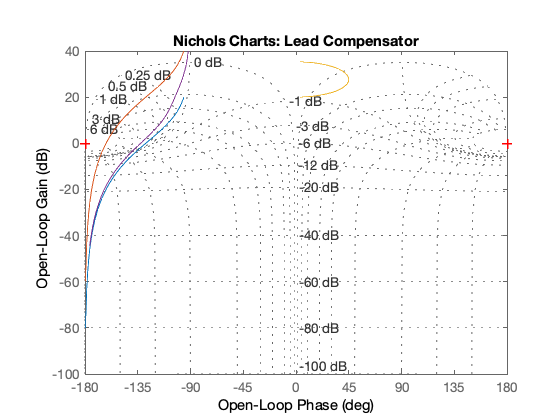

In [27]:
% Nichols
%  blue -- Uncompensated Go(jw)
%  green - Gain compensated KcGo(jw)
%  red -- Lead Compensator KcD(jw)
%  cyan -- Lead Compensated D(jw)Go(jw)
nichols(Go,KcGo,Kc*D,KcDG,w)
   title('Nichols Charts: Lead Compensator'),...
   grid

### Closed-Loop Frequency Response

Now we examine the closed-loop frequency responses. Notice the increase in bandwidth paid for by a slight increase in peak magnification $M_\mathrm{max}$.

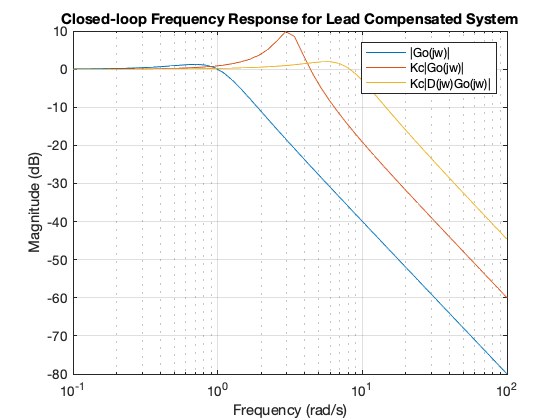

In [28]:
Gc0 = feedback(Go,1);
Gc1 = feedback(KcGo,1);
Gc2 = feedback(KcDG,1);
[mc0,pc0]=bode(Gc0,w);
[mc1,pc1]=bode(Gc1,w);
[mc2,pc2]=bode(Gc2,w);
mc0 = 20.*log10(reshape(mc0,length(w),1));
mc1 = 20.*log10(reshape(mc1,length(w),1));
mc2 = 20.*log10(reshape(mc2,length(w),1));
semilogx(w,mc0,w,mc1,w,mc2),...
   grid,...
   title('Closed-loop Frequency Response for Lead Compensated System'),...
   legend('|Go(jw)|','Kc|Go(jw)|','Kc|D(jw)Go(jw)|'),...
   xlabel('Frequency (rad/s)'),...
   ylabel('Magnitude (dB)')

### Closed-Loop Time Responses

First we examine the closed-loop step responses. Notice the significant increase in speed paid for by a slight increase in peak overshoot %OS.

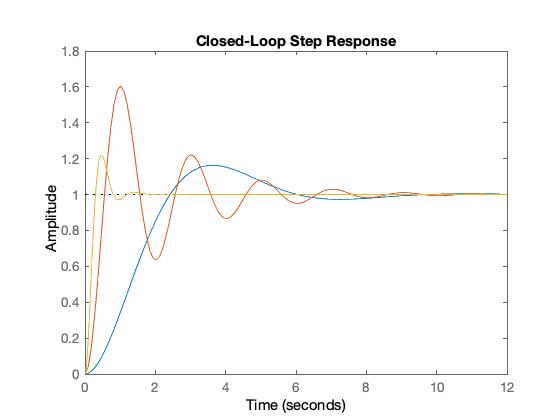

In [29]:
% Blue – uncompensated
% Green - gain compensated
% Red - lead compensated
step(Gc0,Gc1,Gc2),title('Closed-Loop Step Response')

To compute the ramp error response we need to add an integrator to the error reponse:

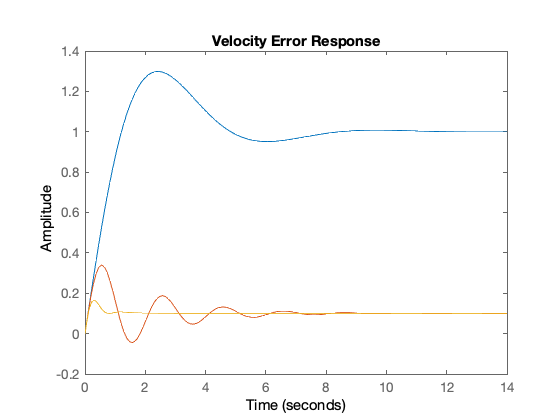

In [30]:
integ=tf(1,[1 0]);
re0 = integ*(1/(1 + Go));
re1 = integ*(1/(1 +KcGo));
re2 = integ*(1/(1 + KcDG));
clf
step(re0,re1,re2), title('Velocity Error Response')

The velocity error is reduced to 10% from 100% showing that $K_v$ is indeed 10.

## Appendix – The Matlab Function `asymp`

The function `asymp` is used to determine the asymptotic magnitude response (in dB) of a system defined by a state-space model. The function is not built-in to Matlab so we provide a listing here. The text should be copied and pasted into the Matlab editor and saved as aymp.m in either the working directory or a directory located on the MATLAB path (e.g. P:\WORK). 

**Important Note**: you will not be able to evaluate the code in this section unless `asymp` is available to MATLAB.

In [3]:
%%file matlab/asymp.m
function [mata] = asymp(a,b,c,d,w)
%ASYMP  Asymptotic bode magnitude response of continuous-time linear systems.
%       [MAG] = ASYMP(A,B,C,D,W)  calculates the asymptotic frequency response 
%       of the system:
%               .
%               x = Ax + Bu                          -1
%               y = Cx + Du             G(s) = C(sI-A) B + D
%
%
%       Vector W must contain the frequencies, in
%       radians, at which the Bode response is to be evaluated.  ASYMP returns
%       matrix MAG with LENGTH(W) rows. MAG is returned in decibels. 
%

%       C.P. Jobling Dingyu Xue 14-02-88
%  	@(#)asymp.m	1.3      

[num,den]=ss2tf(a,b,c,d,1);
%strip off small coefficients of numerator
num=num(abs(num)>1.0e-10);
[zer,pol,k]=tf2zp(num,den);
%strip infinite zeros
zer=zer(zer~=inf);
table = [abs(pol), -1.*ones(length(pol),1)];
table = [table; abs(zer),ones(length(zer),1)];
sort(table);
bode_k=20.*log10(k);
mata=zeros(1,length(w));
%add in contributions from frequency terms
for i=1:length(table)
	break_f = table(i,1);
 	%get points below break frequency
	low_f=w<break_f;
	%get points above
	high_f=~low_f;
        if break_f == 0
		break_f=1;
	else
		bode_k=bode_k+table(i,2)*20.*log10(break_f);
	end
	mata=mata+[zeros(size(w(low_f))),table(i,2)*20*log10(w(high_f)./break_f)];
end
mata=mata+bode_k.*ones(1,length(w));
return

Created file '/Users/eechris/dev/eglm03-textbook/content/05/1/matlab/asymp.m'.


## Resources

An executable version of this document is available to download as a MATLAB Live Script file [freqresp.mlx](matlab/freqresp.mlx).